In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [16]:
train_df=pd.read_csv(r"D:\Project\ineuron_project\cleanedTrain.csv")

In [17]:
#train_df.drop(columns=['Outlet_Identifier'],inplace=True)

In [18]:
train_df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Drinks,48.2692,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,24,Medium,Tier 1,Supermarket Type1,2097.2700


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [20]:
X=train_df.iloc[:,:-1]
y=train_df['Item_Outlet_Sales']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5963, 10)
(2556, 10)
(5963,)
(2556,)


In [23]:
num_cols=[cols for cols in X_train.columns if X_train[cols].dtypes!='O']

In [24]:
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']

In [64]:
cat_cols1=['Item_Type', 'Item_Identifier']
cat_cols2=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
num_cols=['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Age']

# Define the custom ranking for each ordinal variable
fat=['Low Fat','Regular']
out_size=['Small','not_mentioned','Medium','High']
out_loc=['Tier 3','Tier 2','Tier 1']
out_type=['Supermarket Type3','Supermarket Type2','Supermarket Type1','Grocery Store']



## Numerical Pipeline
num_pipe=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('power',PowerTransformer())
])


cat_pipe1=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse=False,drop='first')),
    ('scaler',StandardScaler())

])

cat_pipe2=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OrdinalEncoder(categories=[fat,out_size,out_loc,out_type])),
    ('scaler',StandardScaler())
])


preprocessor=ColumnTransformer(transformers=[
    ('transformer1',num_pipe,num_cols),
    ('transformer2',cat_pipe1,cat_cols1),
    ('transformer3',cat_pipe2,cat_cols2),
])

In [65]:
from sklearn import set_config
set_config(display='diagram')

In [66]:
preprocessor

ColumnTransformer(transformers=[('transformer1',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['Item_Weight', 'Item_Visibility', 'Item_MRP',
                                  'Outlet_Age']),
                                ('transformer2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                                                 ('scaler', Stan...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Low '
                                                                              'Fat',
                                                                              'Regular'],
                                                                             ['Small',
                                                                              'not_mentioned',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '3',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '1'],
                                                                             ['Supermarket '
                                                                              'Type3',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Grocery '
                                                                              'Store']])),
                                                 ('scaler', StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type'])])

In [71]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [72]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [73]:
print(X_train.shape)
print(X_test.shape)

(5963, 18)
(2556, 18)


## MODEL CREATION :

In [87]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import GridSearchCV

In [82]:
models={
    'linear_regression':LinearRegression(),
    'lasso':Lasso(),
    'ridge':Ridge(),
    'elastic_net':ElasticNet(),
    'decision_tree':DecisionTreeRegressor(),
    'Random_forest':RandomForestRegressor(),
    'Adaboost_reg':AdaBoostRegressor(),
    'Gradient_boost_reg':GradientBoostingRegressor(),
    'svr':SVR(),
    'xgb_reg':XGBRegressor()
}

In [85]:
kfold=KFold(n_splits=10,shuffle=True,random_state=42)
r2_scr=[]
for i in models:
    model=models[i]
    score=cross_val_score(model,X_train,y_train,scoring='r2',cv=kfold).mean()
    print(f"for {i}\n")
    print('r2-score',score)
    print('='*80)
    r2_scr.append(score)

for linear_regression

r2-score 0.7104878144874012
for lasso

r2-score 0.7107455672120556
for ridge

r2-score 0.7104902077821487
for elastic_net

r2-score 0.6528142996968054
for decision_tree

r2-score 0.4117451752332356
for Random_forest

r2-score 0.7890999656065532
for Adaboost_reg

r2-score 0.6180203822542494
for Gradient_boost_reg

r2-score 0.8359386691409746
for svr

r2-score 0.20192878979409729
for xgb_reg

r2-score 0.7757150092743168


In [127]:
r2_scr

[0.7104878144874012,
 0.7107455672120556,
 0.7104902077821487,
 0.6528142996968054,
 0.4117451752332356,
 0.7890999656065532,
 0.6180203822542494,
 0.8359386691409746,
 0.20192878979409729,
 0.7757150092743168]

## _________________________________________

## Hyperparameter Tuning :

In [86]:
params={
                "Random_forest":{
                    'n_estimators': [8,16,32,64,128,256]
                },
                "lasso":{},
                "ridge":{},
                "elastic_net":{},
                "svr":{},
                "decision_tree":{},
                "Gradient_boost_reg":{
                    'learning_rate':[.1,.01,.05,.001],
                    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "linear_regression":{},
                "xgb_reg":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
                
                "Adaboost_reg":{
                    'learning_rate':[.1,.01,0.5,.001],
                    'n_estimators': [8,16,32,64,128,256]
                }
                
            }

In [93]:
report = {}
mean_sqr_error=[]
mean_abs_error=[]
for i in range(len(models)):
    model = list(models.values())[i]
    para=params[list(models.keys())[i]]
    # Train model
    gs = GridSearchCV(model,para,cv=3)
    gs.fit(X_train,y_train)
    
    print(list(models.keys())[i])
    print(gs.best_params_)
    model.set_params(**gs.best_params_)
    model.fit(X_train,y_train)

    y_test_pred = model.predict(X_test)
    test_model_score = r2_score(y_test, y_test_pred)
    mean_square_err=mean_squared_error(y_test, y_test_pred)
    mean_abs_err=mean_absolute_error(y_test, y_test_pred)
    
    mean_sqr_error.append(mean_square_err)
    mean_abs_error.append(mean_abs_err)
    report[list(models.keys())[i]] =  test_model_score

linear_regression
{}
lasso
{}
ridge
{}
elastic_net
{}
decision_tree
{}
Random_forest
{'n_estimators': 256}
Adaboost_reg
{'learning_rate': 0.1, 'n_estimators': 64}
Gradient_boost_reg
{'learning_rate': 0.05, 'n_estimators': 128, 'subsample': 0.85}
svr
{}
xgb_reg
{'learning_rate': 0.1, 'n_estimators': 32}


In [99]:
mean_sqr_error

[957111.6285667394,
 957361.0062414962,
 957104.6588741755,
 1211667.2917158324,
 1913105.001703018,
 584188.881611422,
 1312793.4456723274,
 407776.1457476024,
 2388124.1054826304,
 693458.2892313369]

In [103]:
mean_abs_error

[705.0218208101045,
 705.140364468412,
 705.3172500247051,
 978.0012489021435,
 1014.0319901257411,
 571.1167477787458,
 1032.5344309317852,
 394.0769370810366,
 1137.8796514314881,
 605.7844423957374]

In [95]:
report

{'linear_regression': 0.7124856144874497,
 'lasso': 0.7108710672120414,
 'ridge': 0.7041145207478203,
 'elastic_net': 0.6521254299696805,
 'decision_tree': 0.4117448762332012,
 'Random_forest': 0.8188710365606553,
 'Adaboost_reg': 0.668102482254741,
 'Gradient_boost_reg': 0.8721385520409746,
 'svr': 0.1983287897940973,
 'xgb_reg': 0.7973141962778002}

In [105]:
r2_score_param=list(report.values())

In [106]:
r2_score_param

[0.7124856144874497,
 0.7108710672120414,
 0.7041145207478203,
 0.6521254299696805,
 0.4117448762332012,
 0.8188710365606553,
 0.668102482254741,
 0.8721385520409746,
 0.1983287897940973,
 0.7973141962778002]

In [119]:
result_df=pd.DataFrame({
    'Model_Name':list(models.keys()),
    'r2_score':r2_score_param,
    'mean_sqr_err':mean_sqr_error,
    'mean_abs_error':mean_abs_error
})

In [120]:
result_df

,Model_Name,r2_score,mean_sqr_err,mean_abs_error
0,linear_regression,0.712486,9.571116e+05,705.021821
1,lasso,0.710871,9.573610e+05,705.140364
2,ridge,0.704115,9.571047e+05,705.317250
3,elastic_net,0.652125,1.211667e+06,978.001249
4,decision_tree,0.411745,1.913105e+06,1014.031990
5,Random_forest,0.818871,5.841889e+05,571.116748
6,Adaboost_reg,0.668102,1.312793e+06,1032.534431
7,Gradient_boost_reg,0.872139,4.077761e+05,394.076937
8,svr,0.198329,2.388124e+06,1137.879651
9,xgb_reg,0.797314,6.934583e+05,605.784442


In [122]:
result_df=result_df.sort_values(by='r2_score',ascending=False)

In [123]:
result_df

,Model_Name,r2_score,mean_sqr_err,mean_abs_error
7,Gradient_boost_reg,0.872139,4.077761e+05,394.076937
5,Random_forest,0.818871,5.841889e+05,571.116748
9,xgb_reg,0.797314,6.934583e+05,605.784442
0,linear_regression,0.712486,9.571116e+05,705.021821
1,lasso,0.710871,9.573610e+05,705.140364
2,ridge,0.704115,9.571047e+05,705.317250
6,Adaboost_reg,0.668102,1.312793e+06,1032.534431
3,elastic_net,0.652125,1.211667e+06,978.001249
4,decision_tree,0.411745,1.913105e+06,1014.031990
8,svr,0.198329,2.388124e+06,1137.879651


In [132]:
sorted_r2_scr=sorted(r2_scr,reverse=True)
sorted_r2_scr

[0.8359386691409746,
 0.7890999656065532,
 0.7757150092743168,
 0.7107455672120556,
 0.7104902077821487,
 0.7104878144874012,
 0.6528142996968054,
 0.6180203822542494,
 0.4117451752332356,
 0.20192878979409729]

In [133]:
result_df["Before_param_r2_scr"]=sorted_r2_scr

In [134]:
result_df

,Model_Name,r2_score,mean_sqr_err,mean_abs_error,Before_param_r2_scr
7,Gradient_boost_reg,0.872139,4.077761e+05,394.076937,0.835939
5,Random_forest,0.818871,5.841889e+05,571.116748,0.789100
9,xgb_reg,0.797314,6.934583e+05,605.784442,0.775715
0,linear_regression,0.712486,9.571116e+05,705.021821,0.710746
1,lasso,0.710871,9.573610e+05,705.140364,0.710490
2,ridge,0.704115,9.571047e+05,705.317250,0.710488
6,Adaboost_reg,0.668102,1.312793e+06,1032.534431,0.652814
3,elastic_net,0.652125,1.211667e+06,978.001249,0.618020
4,decision_tree,0.411745,1.913105e+06,1014.031990,0.411745
8,svr,0.198329,2.388124e+06,1137.879651,0.201929


In [136]:
result_df['RMSE']=np.sqrt(result_df['mean_sqr_err'])

In [137]:
result_df

,Model_Name,r2_score,mean_sqr_err,mean_abs_error,Before_param_r2_scr,RMSE
7,Gradient_boost_reg,0.872139,4.077761e+05,394.076937,0.835939,638.573524
5,Random_forest,0.818871,5.841889e+05,571.116748,0.789100,764.322498
9,xgb_reg,0.797314,6.934583e+05,605.784442,0.775715,832.741430
0,linear_regression,0.712486,9.571116e+05,705.021821,0.710746,978.320821
1,lasso,0.710871,9.573610e+05,705.140364,0.710490,978.448264
2,ridge,0.704115,9.571047e+05,705.317250,0.710488,978.317259
6,Adaboost_reg,0.668102,1.312793e+06,1032.534431,0.652814,1145.771987
3,elastic_net,0.652125,1.211667e+06,978.001249,0.618020,1100.757599
4,decision_tree,0.411745,1.913105e+06,1014.031990,0.411745,1383.150390
8,svr,0.198329,2.388124e+06,1137.879651,0.201929,1545.355657


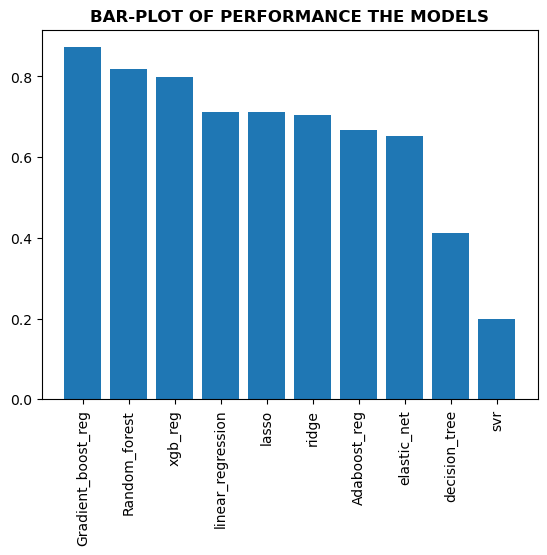

In [152]:
plt.title('BAR-PLOT OF PERFORMANCE THE MODELS',fontweight='bold')
plt.bar(result_df['Model_Name'],result_df['r2_score'])
plt.xticks(rotation=90)
plt.show()

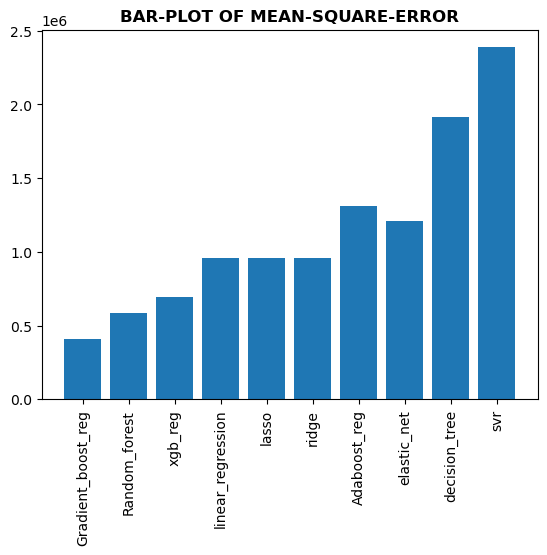

In [153]:
plt.title('BAR-PLOT OF MEAN-SQUARE-ERROR',fontweight='bold')
plt.bar(result_df['Model_Name'],result_df['mean_sqr_err'])
plt.xticks(rotation=90)
plt.show()

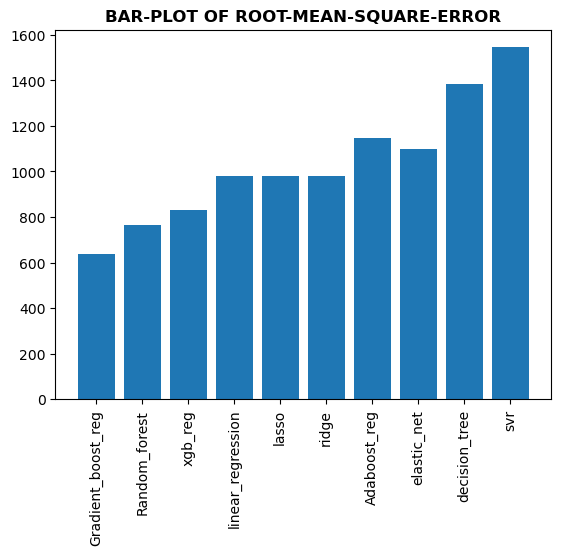

In [154]:
plt.title('BAR-PLOT OF ROOT-MEAN-SQUARE-ERROR',fontweight='bold')
plt.bar(result_df['Model_Name'],result_df['RMSE'])
plt.xticks(rotation=90)
plt.show()

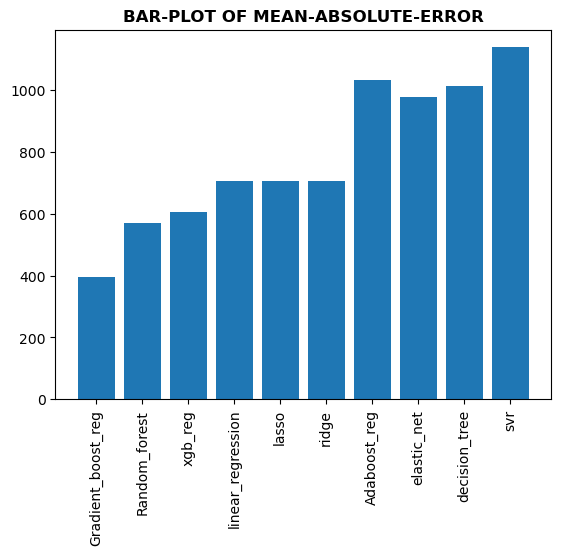

In [155]:
plt.title('BAR-PLOT OF MEAN-ABSOLUTE-ERROR',fontweight='bold')
plt.bar(result_df['Model_Name'],result_df['mean_abs_error'])
plt.xticks(rotation=90)
plt.show()

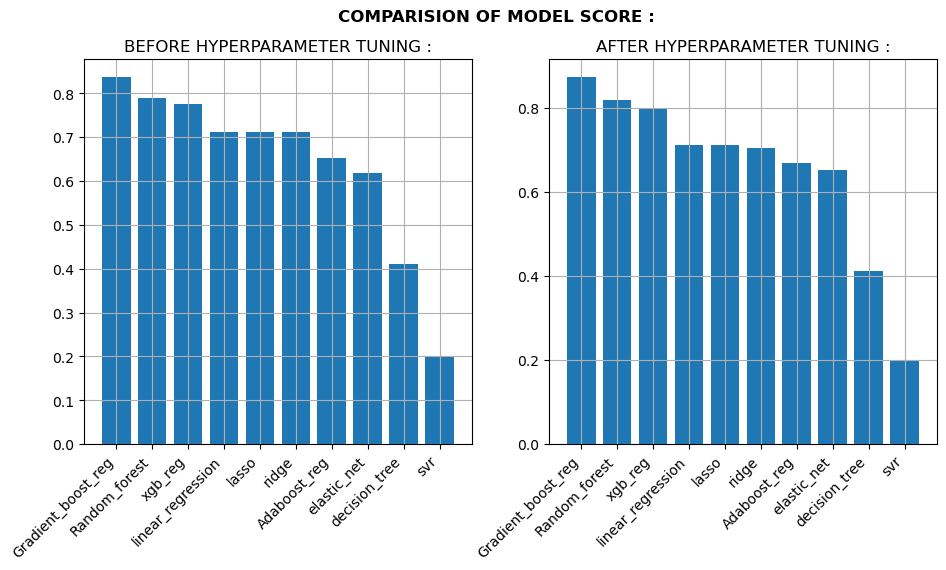

In [186]:
plt.figure(figsize=(11,5))
plt.suptitle('COMPARISION OF MODEL SCORE :',fontweight='bold')

ax1=plt.subplot(1,2,1)
ax1.bar(result_df['Model_Name'],result_df['Before_param_r2_scr'])
ax1.set_title("BEFORE HYPERPARAMETER TUNING :")
ax1.grid()
ax1.set_xticklabels(result_df['Model_Name'],rotation=45, ha='right')



ax2=plt.subplot(1,2,2)
ax2.bar(result_df['Model_Name'],result_df['r2_score'])
ax2.set_title("AFTER HYPERPARAMETER TUNING :")
ax2.grid()
ax2.set_xticklabels(result_df['Model_Name'],rotation=45, ha='right')



plt.show()

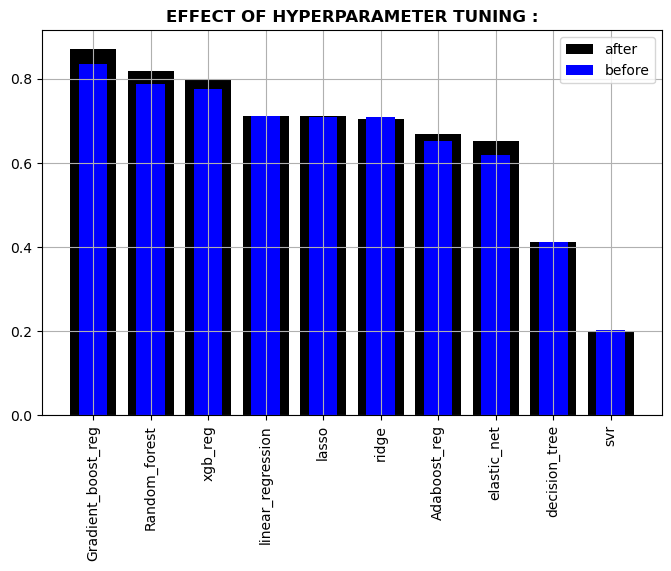

In [195]:
plt.figure(figsize=(8,5))
plt.title('EFFECT OF HYPERPARAMETER TUNING :',fontweight='bold')
plt.bar(result_df['Model_Name'],result_df['r2_score'],color='black',label='after')
plt.bar(result_df['Model_Name'],result_df['Before_param_r2_scr'],width=0.5,color='blue',label='before')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

## Finalized the best model and Predict the test dataset : 

In [200]:
best_model=GradientBoostingRegressor(learning_rate=0.05, n_estimators=128, subsample= 0.85)

In [201]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=128, subsample=0.85)

In [202]:
y_pred=best_model.predict(X_test)

In [204]:
r2_score(y_test,y_pred)

0.8721385520409746

**So we got the best model for this dataset as `GredientBoostRegressor` with 87.213 % R2-score.**

## Dumping my model and Processor :

In [211]:
import pickle

In [212]:
with open('model_GBR.pkl', "wb") as file_obj:
            pickle.dump(best_model, file_obj)

In [213]:
with open('preprocessor_GBR.pkl', "wb") as file_obj:
            pickle.dump(preprocessor, file_obj)

### Predict our given test dataset:

In [252]:
test_df=pd.read_csv(r"D:\Project\ineuron_project\cleanedTest.csv")

In [246]:
with open('preprocessor_GBR.pkl','rb') as file_obj:
    preprocessor= pickle.load(file_obj)

In [257]:
test_df_arr=preprocessor.transform(test_df)

In [258]:
sales_result=best_model.predict(test_df_arr)

In [259]:
sales_result

array([1689.34285746, 1400.21449061,  684.55409944, ..., 1921.95432026,
       3547.72905214, 1288.73014437])

In [260]:
test_df['Sales_Result']=sales_result

In [263]:
test_df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Age,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_Result
3126,NC,8.600,Low Fat,0.069080,others,89.6146,38,Medium,Tier 3,Supermarket Type3,2482.605987
2258,FD,10.300,Low Fat,0.027358,Fruits and Vegetables,99.1042,24,Medium,Tier 1,Supermarket Type1,1700.624415
5622,NC,14.600,Low Fat,0.059647,others,183.0976,14,Medium,Tier 3,Supermarket Type2,2768.358488
155,FD,4.635,Low Fat,0.140772,snacks_breakfast_type,129.4994,36,High,Tier 3,Supermarket Type1,2086.407182
367,FD,20.850,Low Fat,0.021326,Fruits and Vegetables,104.6306,19,Small,Tier 2,Supermarket Type1,1569.010030


In [266]:
#test_df.to_csv('sales_result.csv',index=False)